In [43]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from collections import defaultdict

import my_graph_helpers as mgh
import my_graph as mg

In [2]:
reload(mgh)
reload(mg)

<module 'my_graph' from 'my_graph.pyc'>

In [3]:
def new_length(block,a):
    myG = block.copy()    
    myG.define_roads()
    myG.define_interior_parcels()

    len(myG.interior_parcels)
    # print "alpha = {}".format(a)
    
    new_roads, bisect = mgh.build_all_roads(myG, barriers=False, alpha=a, vquiet=True)
    return new_roads,myG


In [41]:
def nice_histogram(a,x,bounds=None):
    num_bins = 40
    if bounds is None:
        bounds=[x.min(),x.max()]
        
        
    textstr = '$n={0}$ \n $\mu={1:.2f}$ \n $\sigma={2:.2f}$'.format(len(x), x.mean(), x.std())
    # the histogram of the data
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    n, bins, patches = plt.hist(x, num_bins, range=bounds, normed=1,
                                facecolor='grey', alpha=0.5)
    # add a 'best fit' line
    y = mlab.normpdf(bins, x.mean(), x.std())
    plt.plot(bins, y, 'r--')
    plt.xlabel('Length of new roads')
    plt.ylabel('Probability')
    plt.title(r'$\alpha = {0}$'.format(a))
    plt.text(.85, .85,textstr, transform=ax.transAxes)
    plt.savefig("histogram_alpha_"+str(a)+".pdf", format='pdf', pad_inches=0.5)

In [5]:
### Import data
filename = "data/epworth_before"
place = "epworth"
rezero = np.array([305680, 8022350])
original = mgh.import_and_setup(1, filename, rezero=rezero,
                                connected=True, name=place+"_S0")

data loaded


In [6]:
# component = 45 is current example block
component = 11

block = original.connected_components()[component]
block.define_roads()
block.define_interior_parcels()

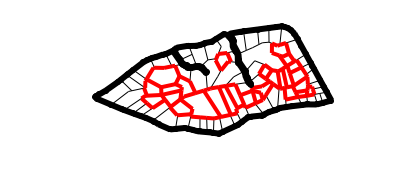

In [7]:
myG = block.copy()    
myG.define_roads()
myG.define_interior_parcels()
myG.plot_roads(master=block, new_road_width = 4, old_node_size=25, old_road_width = 6)
#plt.savefig("base_block.pdf", format='pdf')

#new_roads = mgh.build_all_roads(myG, barriers = False, alpha = 2, wholepath = True, 
#                                plot_intermediate=True)

#myG.plot_roads(master=block, new_road_width = 4, old_node_size=25, old_road_width = 6, 
#               barriers = False)
#plt.savefig("Full_Solution.pdf", format='pdf')

In [8]:
alpha = [0.5,1,2,4,8,16]
d=defaultdict(list)

for a in alpha:
    r = 0
    print "alpha = {}".format(a)
    for r in range(0,100):
        nr,myG = new_length(block,a)
        d[a].append(nr)
        if r in [0,50,100,150]:
            print "r={}, alpha={}".format(r,a)


alpha = 0.5
r=0, alpha=0.5
r=50, alpha=0.5
alpha = 1
r=0, alpha=1
r=50, alpha=1
alpha = 2
r=0, alpha=2
r=50, alpha=2
alpha = 4
r=0, alpha=4
r=50, alpha=4
alpha = 8
r=0, alpha=8
r=50, alpha=8


[394.39912415870799, 738.14685750036824]


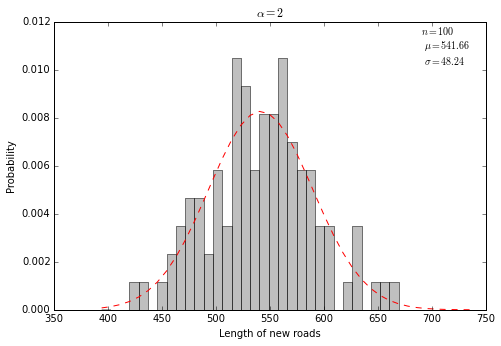

In [42]:
bounds = [np.array([d[a] for a in d]).min(), np.array([d[a] for a in d]).max()]  

for a in [2]:
    x = np.array(d[a])
    nice_histogram(a, x, bounds)